In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cyclistic Capstone Project
## Ross Doyle
## 05/04/2022

Cyclistic, a bike rental company based in Chicago, wants to maximise annual memberships by converting one time payment users as they believe this will be the reason for the company’s future success. I am looking to review data collected about all customers from 2021 to see what conclusions can be drawn.

The marketing plan constructed by Cyclistic previously focussed on building awareness and appealing to a broad customer group. One way this was achieved was with flexible options such as single ride, day pass and annual pass tickets. The Director of Marketing believes the next step is to convert current casual users into annual members.


The Task;

Determine how casual riders and annual members use Cyclistic bikes differently. Once this is Achieved, determine what the best marketing approach would be to convince casual riders to purchase annual memberships. Think how digital media can be utilized to achieve this goal.
It is important to keep in mind stakeholders and their needs in order to solve the issue set out to us;
* Lily Monero – Director of Marketing. She is responsible for developing campaigns and other promotional responsibilities. The case study should look to tell her how best to utilise marketing resources to convert casual riders into annual members.
* Cyclitic executive team – known for their high standards when it comes to detail and determine whether to approve the marketing program. A well structured case study with few holes and an attention to details will be important in order to convince the Executive team to give the green light to the marketing strategy.


# Ask

* How do members and casual riders use the service differently?
* How can casual riders be convinced to purchase annual memberships?
* What trends should marketing look to take advantage of?

# Prepare

The data has been collected by Motivate International Inc, A bicycle rental company based in The United States. They Operate in the City of Chicago and give an ideal comparison of how the fictional company Cyclistic would function in the same area. The data for bike rides from Jan-Dec 2021 was collected from [Amazon AWS](https://divvy-tripdata.s3.amazonaws.com/index.html) and is made public under this [License](https://ride.divvybikes.com/data-license-agreement).


The data is collected monthly and stored as a .csv file for each individual month. It is comprehensive data, in that each file contains every bike ride taken through the Motivate International share system for that given month. The data does not disclose personal information about riders, which means frequent customers are not distinguishable. However, with the size of data collected it will still be possible to draw accurate conclusions as to how casual riders and members differ.


I saved each file locally, so the code used to import each dataset into RStudio is written with this in mind.

# Process

The tools used for this Project where Excel, Rstudio and Tableau. 

In [ ]:
#install packages in R that allow data to be manipulated to construct a new, clean dataset easier

install.packages('tidyverse')
library(tidyverse)
install.packages("janitor")
library(janitor)
install.packages('lubridate')
library(lubridate)

## 1. Import csv files containing data into Rstudio to be cleaned

In [ ]:
#Import Data into Rstudio

Jan_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202101-divvy-tripdata.csv")
Feb_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202102-divvy-tripdata.csv")
Mar_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202103-divvy-tripdata.csv")
Apr_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202104-divvy-tripdata.csv")
May_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202105-divvy-tripdata.csv")
Jun_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202106-divvy-tripdata.csv")
Jul_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202107-divvy-tripdata.csv")
Aug_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202108-divvy-tripdata.csv")
Sep_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202109-divvy-tripdata.csv")
Oct_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202110-divvy-tripdata.csv")
Nov_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202111-divvy-tripdata.csv")
Dec_21 <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/202112-divvy-tripdata.csv")

Initially Rstudio had issues importing the csv files. The 'getwd()' function shows where the current working directory is located and where files can be drawn from. using 'setwd()' I was able to change the directory to the file I had stored the datasets in.

In [ ]:
#check to see that columns are made of same data type to combine later

str(Jan_21)
str(Mar_21)
str(May_21)
str(Jul_21)
str(Sep_21)
str(Nov_21)

## 2. Collect all data into a singular dataframe to clean

In [ ]:
#collect all 12 months into a single table

Cyclistic_21 <- rbind(Jan_21, Feb_21, Mar_21, Apr_21, May_21, Jun_21, Jul_21, Aug_21, Sep_21, Oct_21, Nov_21, Dec_21)
remove(Jan_21, Feb_21, Mar_21, Apr_21, May_21, Jun_21, Jul_21, Aug_21, Sep_21, Oct_21, Nov_21, Dec_21)

In [ ]:
#can check all files have join by using head() for Jan_21 and Cyclistic_21

head(Cyclistic_21)
head(Jan_21)

#save new dataframe as CSV file

write.csv(Cyclistic_21, "C:/Users/rossd/Desktop/bike company/unzipped//Cyclistic_21.csv", row.names = FALSE)

## 3. Cleaning the data

In [ ]:
#change stated_at and ended_at columns to be in date time format

Cyclistic_21[['ended_at']] <- as.POSIXct(Cyclistic_21[['ended_at']], format = "%Y-%m-%d %H:%M:%S")
Cyclistic_21[['started_at']] <- as.POSIXct(Cyclistic_21[['started_at']], format = "%Y-%m-%d %H:%M:%S")



#overwrite old Cyclistic_21 file (for removing null values later)

write.csv(Cyclistic_21, "C:/Users/rossd/Desktop/bike company/unzipped//Cyclistic_21.csv", row.names = FALSE)



#Fill blanks with NA to remove all rows with empty cells

bike_data <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/Cyclistic_21.csv", na.strings = c("","NA"))
head(bike_data)

Cyclistic_2021<- na.omit(bike_data)


can check for errors member_casual and rideable_type columns as these have limited entries

In [ ]:
#quick check for entries other than member or casual/classic, regular, docked

table(Cyclistic_2021$member_casual)
table(Cyclistic_2021$rideable_type)

finish removing useless entries such as duplicates

In [ ]:
#removing duplicate entries from ride_id column, so that every entry is unique

nrow(Cyclistic_2021)

Cyclistic_2021 <- distinct(Cyclistic_2021, ride_id, .keep_all = TRUE)

#running nrow again shows we do not have any duplicate entries

nrow(Cyclistic_2021)

#ride duration to 2 dp

format(round(Cyclistic_2021$ride_duration,2), nsmall = 2)


# Analysis

Add new columns that examine ride duration, the hour/day/month of the bike ride

In [ ]:
#add columns for ride length, ride day of week, ride month, hour of the day

ride_length <- difftime(Cyclistic_2021$ended_at, Cyclistic_2021$started_at, units = "mins")
Cyclistic_2021 <- mutate(Cyclistic_2021, ride_duration = ride_length)

time_day <- hour(Cyclistic_2021$started_at)
Cyclistic_2021 <- mutate(Cyclistic_2021,time_of_day = time_day)

ride_day <- wday(Cyclistic_2021$started_at,TRUE)
Cyclistic_2021 <- mutate(Cyclistic_2021,day_of_ride = ride_day)

ride_month <- month(Cyclistic_2021$started_at)
Cyclistic_2021 <- mutate(Cyclistic_2021,month_of_ride = ride_month)

finally, removing rides shorter than 2 minutes and longer than 24 hours (Divvy recognises these as stolen bikes)

In [ ]:
#remove rides shorter than 2 minutes and longer than 24 hours - remove negative ride times
Cyclistic_2021 <- Cyclistic_2021[!(Cyclistic_2021$ride_duration <= 2|Cyclistic_2021$ride_duration >= 1440
                                   |Cyclistic_2021$ride_duration < 0),]

Save the new dataframe as csv file, to be used to create visualisations

In [ ]:
write.csv(Cyclistic_2021,"C:/Users/rossd/Desktop/bike company/unzipped//Cleaned_Bike_Data.csv")

## Further Analysis
To achieve our main business task we need to compare the habits of customers who are annual members against those who are not.
A second dataframe observing the direct differences between the two will be useful. Columns will include total trips and total ride time.

In [ ]:
#Import our cleaned dataset

data <- read.csv("C:/Users/rossd/Desktop/bike company/unzipped/Cleaned_Bike_Data.csv")

Calculate the mean ride time and the total number of trips for both parties

In [ ]:
#Calculate the mean ride duration and create a dataframe

mean(data$ride_duration)
member_casual_data <- aggregate(data$ride_duration ~ data$member_casual, FUN = mean)

#add more columns containing the total ride duration for all trips and the total number of trips

member_casual_data <- mutate(member_casual_data,total_ride_duration = aggregate(data$ride_duration ~ data$member_casual,FUN = sum))
member_casual_data <- mutate(member_casual_data, total_trips = table(data$member_casual))

In [ ]:
#Rename Columns so they are easier to identify later

member_casual_data %>%
  rename(
    "data$member_casual" = member_cas,
    "data$ride_duration" = average_duration,
    "total_ride_duration.data$ride_duration" = total_ride_time
  )

#check


colnames(member_casual_data)

Save this new dataframe tobe used for visualisations

In [ ]:
#save as csv

write.csv(member_casual_data,"C:/Users/rossd/Desktop/bike company/unzipped//member_info.csv")

# Share

We can first look at the total number of trips and the total amount of time for each group of customers

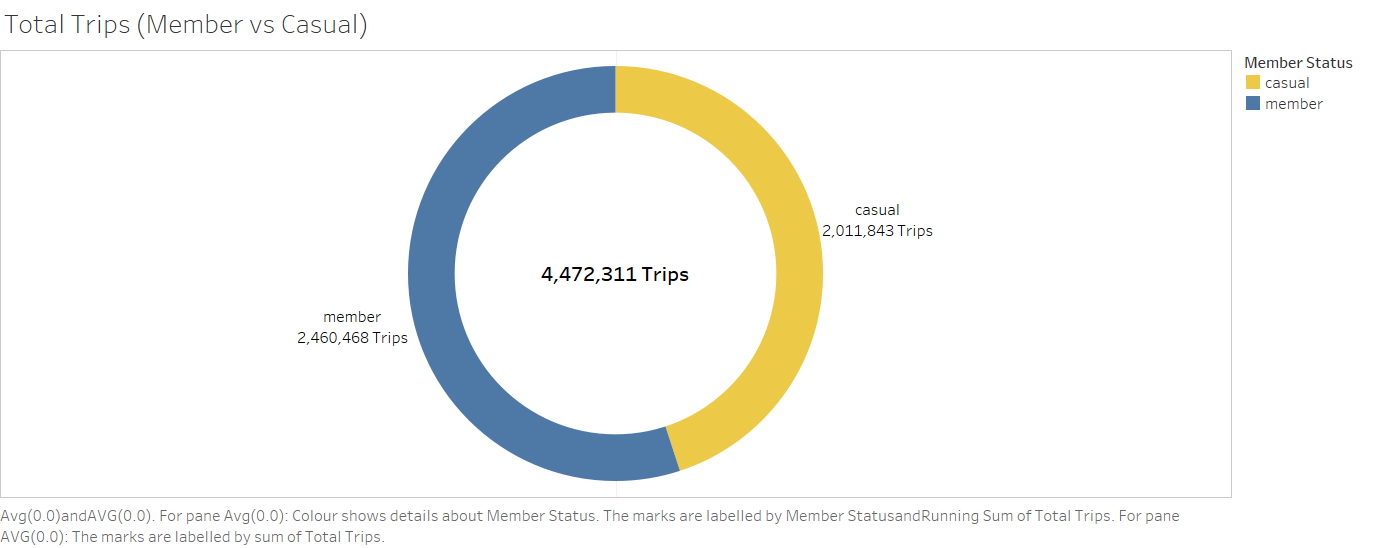, 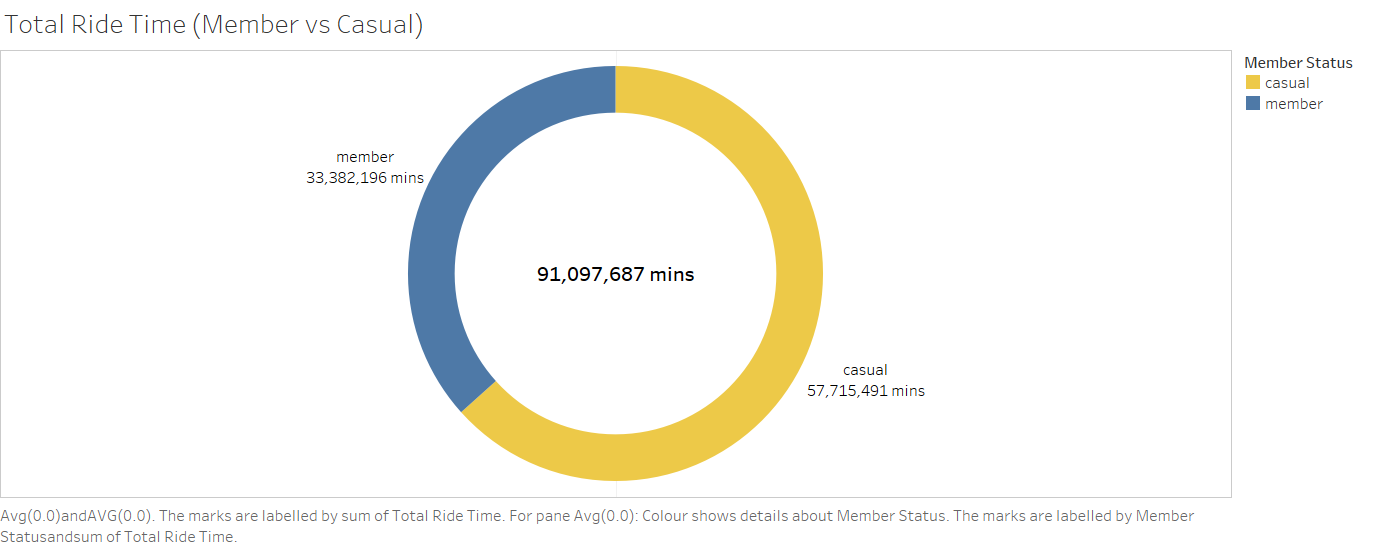

At first it appears that although the majority of rides are taken by current members, casual riders spend more time using the service.

Looking more closely we can see more trends that distinguish casual riders from annual members.

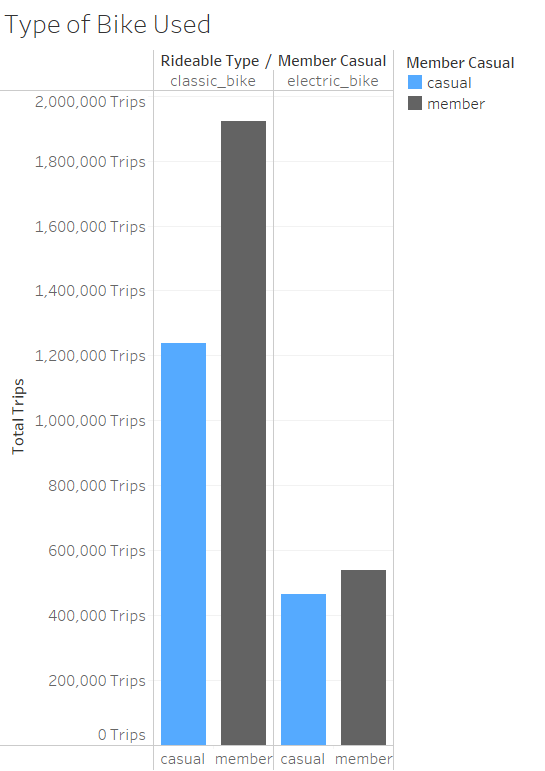

Classic bikes are far more popular than the electric bike alternative. Although the information is not available, it is safe to assume that either the electric bicycle is more expensive to hire or is not completely reliable/accessible as the classic bike.

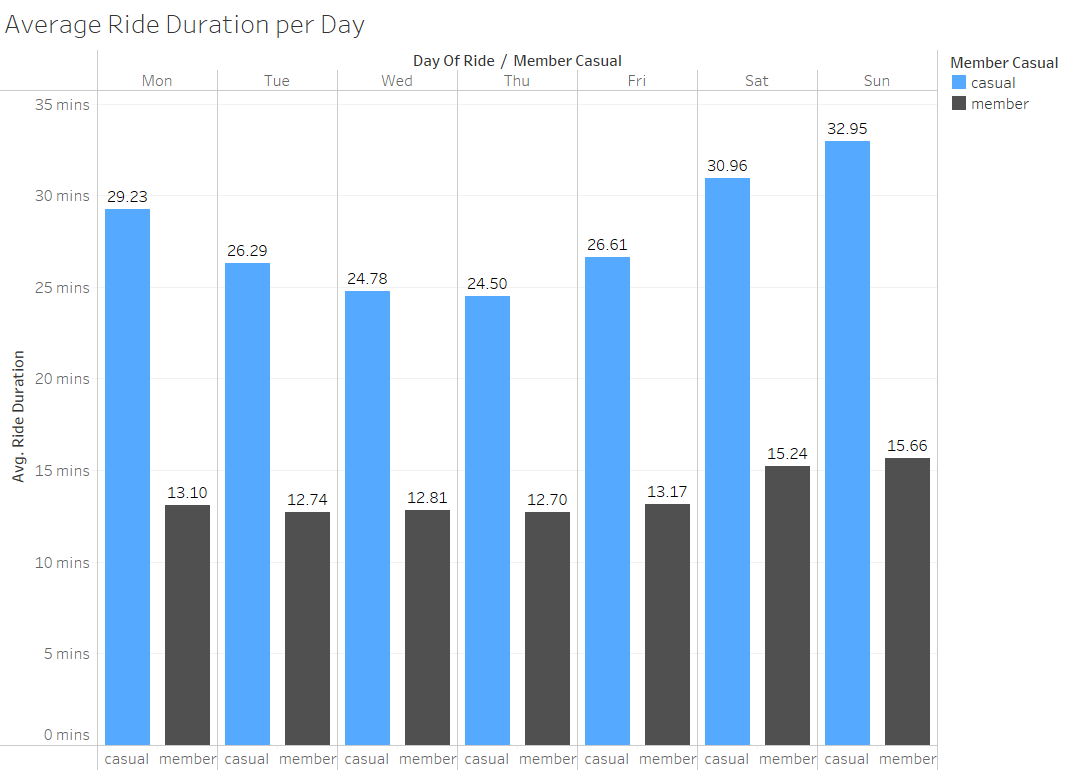


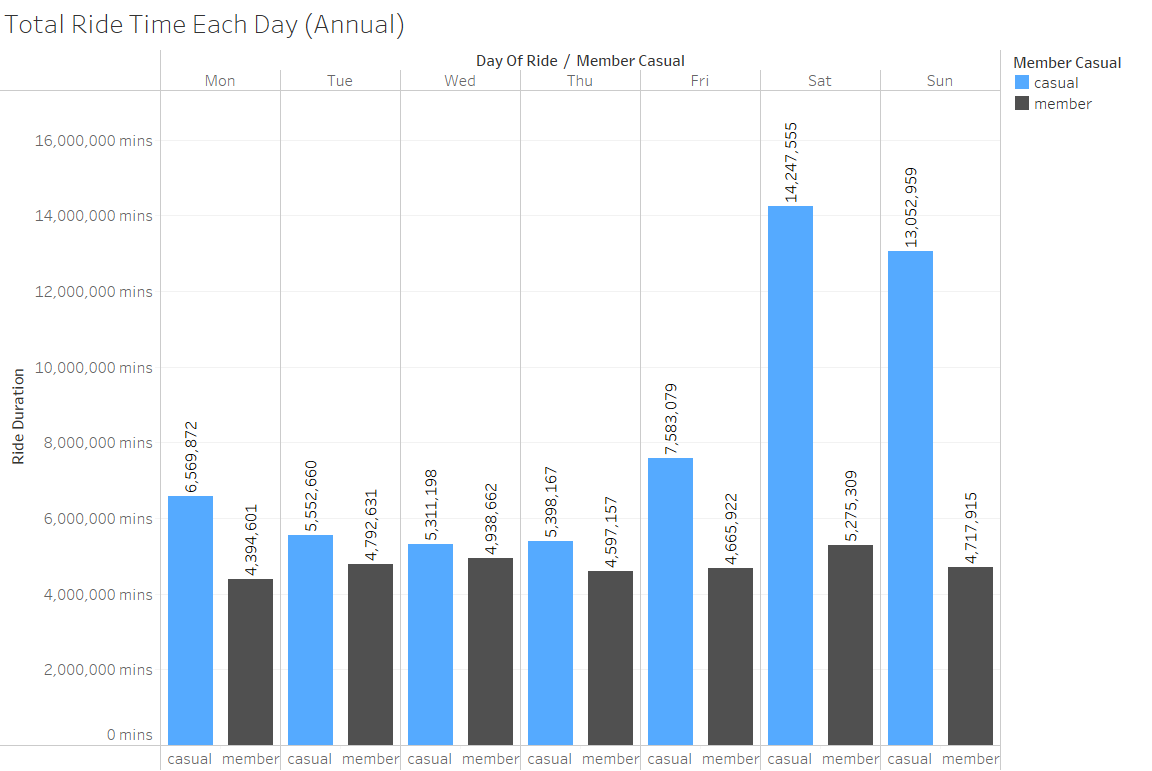

Examining the data across the week again shows that casual riders take longer journeys than annual members. The highest average and total ride time are both claimed by casual riders on a Saturday, with Sunday following close behind.

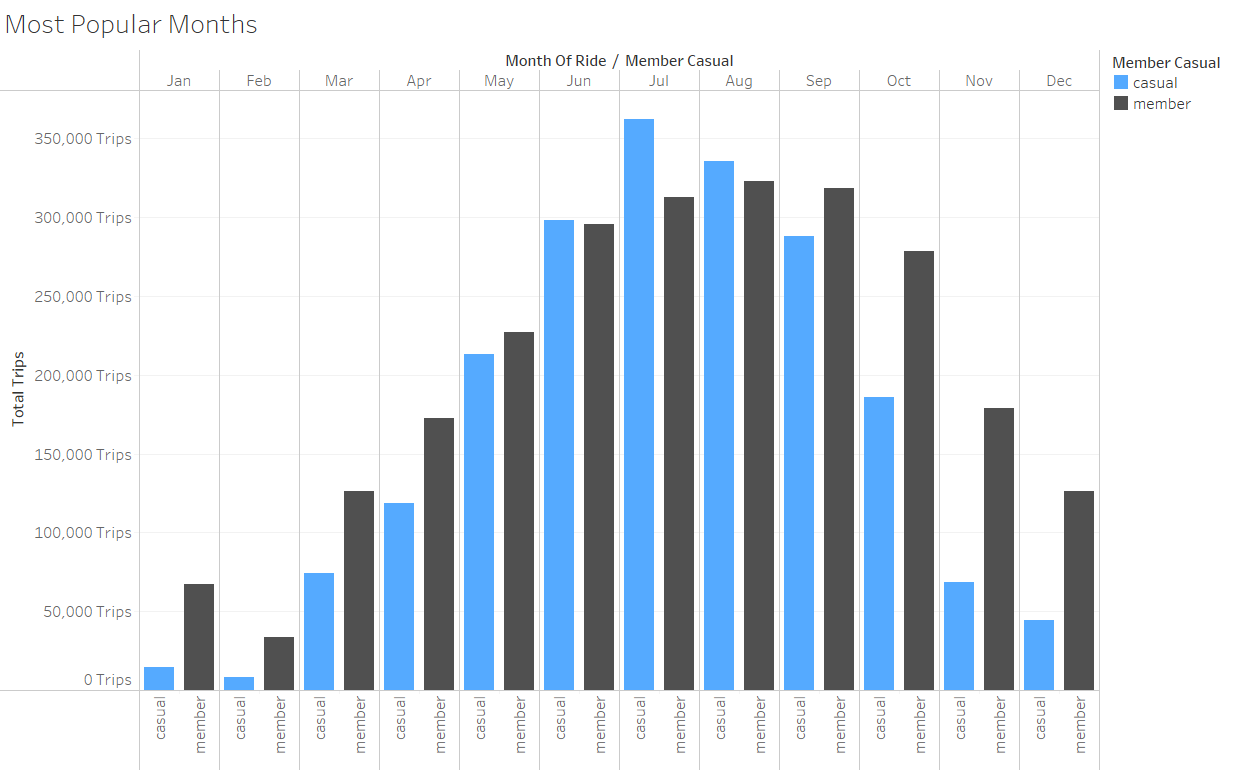

The hotter summer months see a large increase in users. The number of trips then begins to tail off in September and steadily decrease to below 50,00 trips during the winter period for casual riders.

Although more consistent, members follow a similar trend.

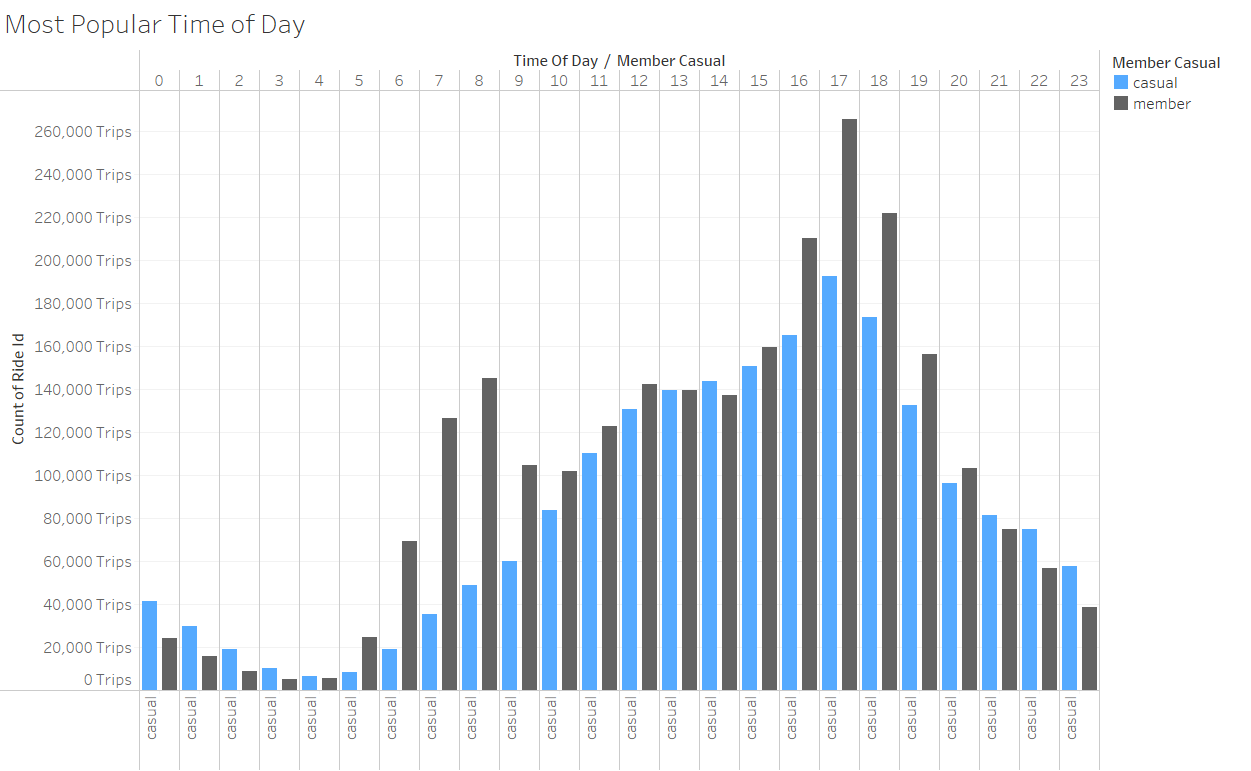

Observing the most popular time of day highlights the different preferences between members and casual riders. During rush hours member ride numbers soare as thier primary use for the service is to commute to work. 
Casual riders instead see a gradual climb towards peak hours around 17:00, before steadily declining as the day comes to an end.

### Conclusions

From the data collected and by observing the graphs we can identify the following;
* Casual riders use the service for leisure, Annual members for business and work
* The majority of the customerbase are casual riders, prefering the brighter hours of the day, and warmer times of the year
* Both parties prefer the Classic bike over the Electric bike

# Act



The goal of this project set out by the stakeholders was to analyse the data to determine the best approach to convert casual riders into annual members. Based off of our findings, some good routes to take would be;

* Create a summer time pass (or three month pass) at a reduced rate, that will then return to regular pricing at the end of the allocated time period. This takes advantage of both parties increases volume during the summer, and could see casual riders who enjoy the benefits of a long-term pass continue their subscription.

* provide benefits to annual pass members on the weekends. If electrical bikes are more expensive, the annual pass can be advertised as more cost effective than individual hires. Emphasising electrical bike rides and more relaxing will appeal to the casual audience, who use the service for pleasure more than business.

* Provide an awards scheme for total amount of ride time accumulated on the annual pass. Casual riders have significantly longer ride durations, providing benefits to those who spend the most time on the hire bikes would appeal immensely here.

The marketing team will look to take advantage of social media platforms to advertise the above suggestions. After some time, data can again be collected to identify if the marketing strategy has been successful, and look to continue growing the business further into the future.